In [1]:
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 55.3 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 66.3 MB/s eta 0:00:0031m76.3 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Extraction des données

In [3]:
source = DataSource("./../data.json")
dataframe_list = source.filter([["WC"], ["M"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)
    # print(athlete,":") # noqa: ERA001
    # print(f"   ski_points: {athletes_data[athlete]["ski_points"]["raw"]["mean"]}")  # noqa: ERA001
    # print(f"   air_points: {athletes_data[athlete]["air_points"]["raw"]["mean"]}") # noqa: ERA001
    # print(f"   time_points: {athletes_data[athlete]["time_points"]["raw"]["mean"]}") # noqa: ERA001

len(athletes_data)

126

# Création d'un DataFrame utilisable pour le clustering

In [4]:
data = []
athlete_names = []

for athlete, attributes in athletes_data.items():
    athlete_names.append(athlete)
    data.append([attributes["ski_points"]["raw"]["mean"], attributes["air_points"]["raw"]["mean"], attributes["time_points"]["raw"]["mean"]])

df_athletes = pd.DataFrame(data, columns=["ski_points", "air_points", "time_points"], index=athlete_names)

df_athletes

,ski_points,air_points,time_points
LEWIS Alex,40.750000,12.400000,12.865000
OLGAARD Robin,32.450000,11.642000,12.139000
FJALLSTROM Ludvig,46.550000,13.630000,14.915000
VARGA Maxence,41.500000,11.640000,11.070000
NOVIKOV Viacheslav,30.066667,11.530000,14.193333
...,...,...,...
McQUINN George,43.533333,14.573333,15.573333
LAVOIE Alexandre,38.262500,13.362500,14.487500
KANNO Shugo,25.050000,8.077500,13.565000
MOUILLE Thibaud,38.211765,13.099412,13.251176


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

Text(0, 0.5, 'Cour du modele (Inertia)')

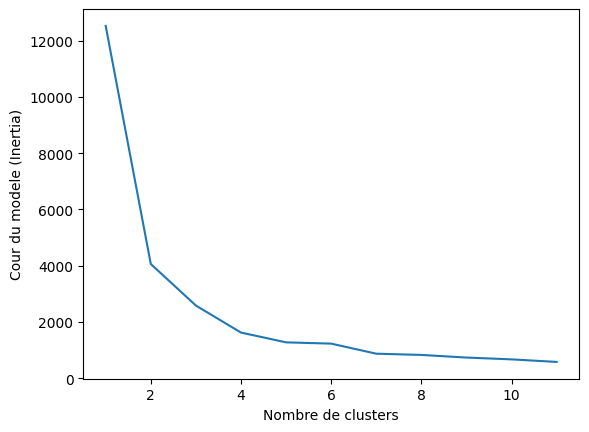

In [5]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")

# Nettoyage des données (enlever anomalies)

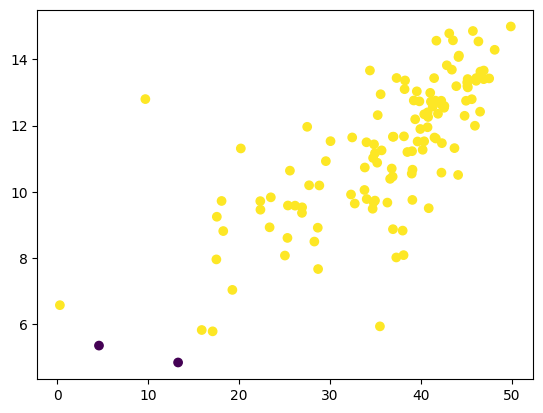

In [6]:
clean_model = IsolationForest(contamination=0.01)
clean_model.fit(df_athletes)
plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))

# Clustering sur les données

In [ ]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
model.cluster_centers_

array([[26.12362121,  9.72762338, 12.60911354],
       [43.49523875, 12.84269042, 15.14016281],
       [13.78123737,  7.63659343, 11.12481818],
       [36.40938513, 10.8492139 , 13.88196157]])

/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/tomjeannesson/Documents/ENSIMAG3A/COD/ENSIMAG3A-COD-IA/.venv/lib/pytho

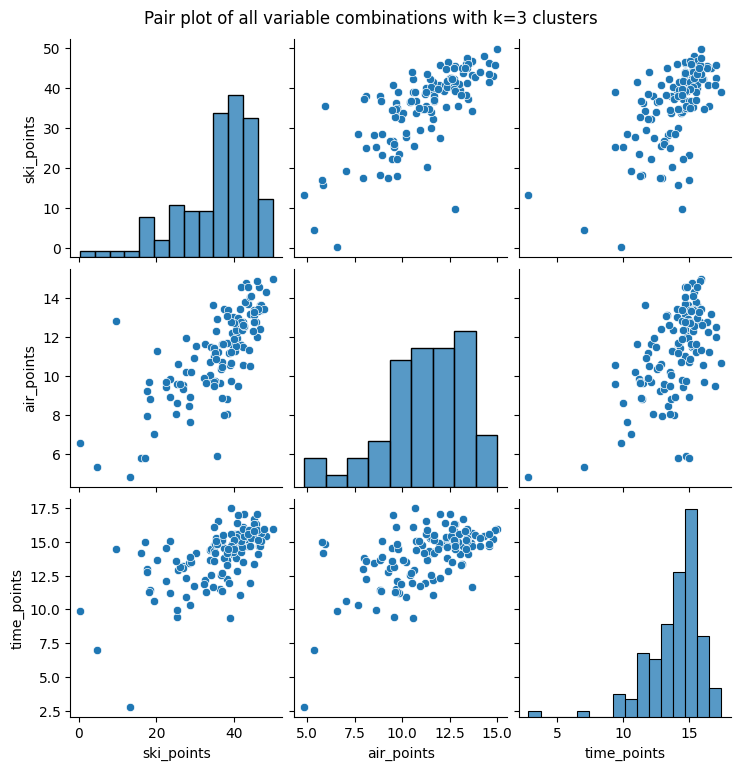

In [12]:
sns.pairplot(df_athletes, palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

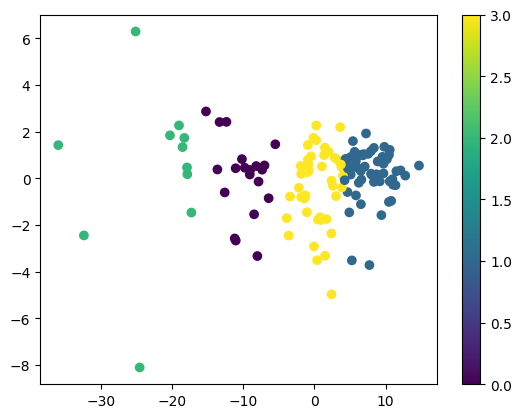

In [13]:
reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes)
plt.scatter(athletes_reduced[:, 0], athletes_reduced[:, 1], c=model.predict(df_athletes))  # Pas sur du c=...
plt.colorbar()

In [14]:
reduct_model.components_

array([[ 0.97584112,  0.17031377,  0.13684786],
       [-0.19797727,  0.4243906 ,  0.88357095]])